In [1]:
import pandas as pd
from datetime import datetime

# Загрузка данных 
data = pd.read_csv('kdrama_DATASET.csv')

# Просмотр данных
data.head()

# Получаем текущий год
current_year = datetime.now().year

# Создаем новый столбец, показывающий, сколько лет назад вышла дорама
data['Years since release'] = current_year - data['Year of release']

# Проверяем результат
print(data[['Title', 'Year of release', 'Years since release']].head())

# Сохраняем обратно в CSV
data.to_csv('kdrama_DATASET_updated.csv', index=False)

                              Title  Year of release  Years since release
0                    Move to Heaven             2021                    4
1              Twinkling Watermelon             2023                    2
2                            Moving             2023                    2
3  The Trauma Code: Heroes on Call              2025                    0
4                    Flower of Evil             2020                    5


In [2]:
# Загрузка обновленных данных 
df = pd.read_csv('kdrama_DATASET_updated.csv')

# Проверка на полные дубликаты
print(f"Всего строк до удаления дублей: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Осталось строк после удаления: {len(df)}")

# Проверка дублей по названию
print(f"Дубли по названию:\n{df[df.duplicated(['Title'], keep=False)].sort_values('Title')}")

# Анализ пропусков
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

# Заполнение пропусков в числовых столбцах
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Number of Episodes'] = df['Number of Episodes'].fillna(df['Number of Episodes'].median())

# Для категориальных данных
df['Genre'] = df['Genre'].fillna('Unknown')
df['Actors'] = df['Actors'].fillna('Not specified')

Всего строк до удаления дублей: 350
Осталось строк после удаления: 350
Дубли по названию:
Empty DataFrame
Columns: [Rank, Title, Year of release, Number of Episodes, Rating, Description, Genre, Tags, Actors, Years since release]
Index: []
Пропущенные значения по столбцам:
Rank                   0
Title                  0
Year of release        0
Number of Episodes     0
Rating                 0
Description            0
Genre                  0
Tags                   0
Actors                 0
Years since release    0
dtype: int64


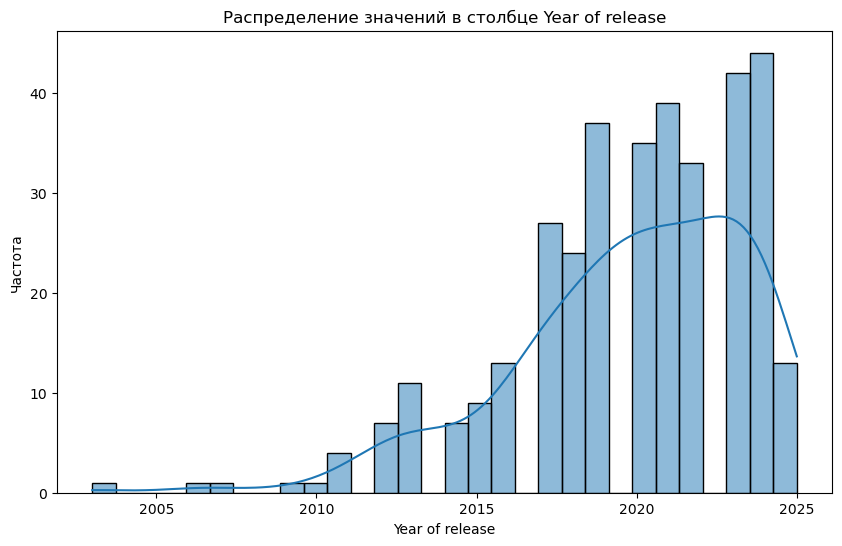

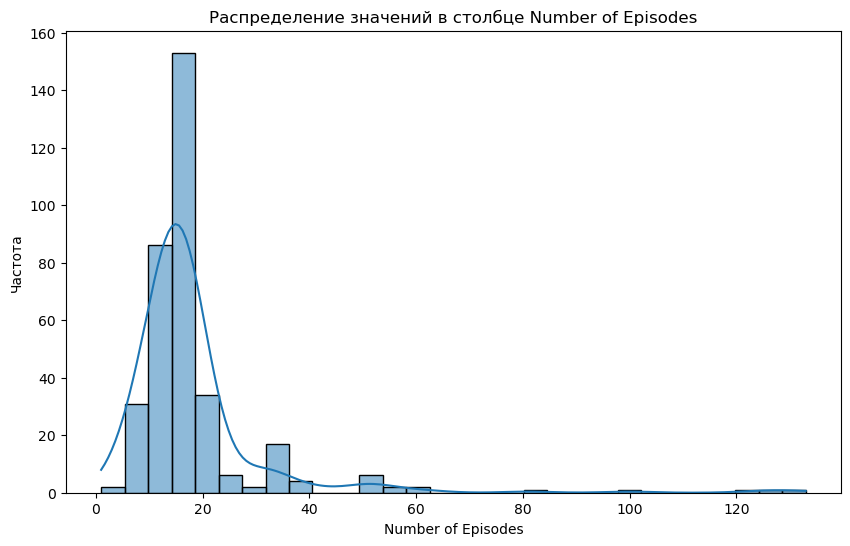

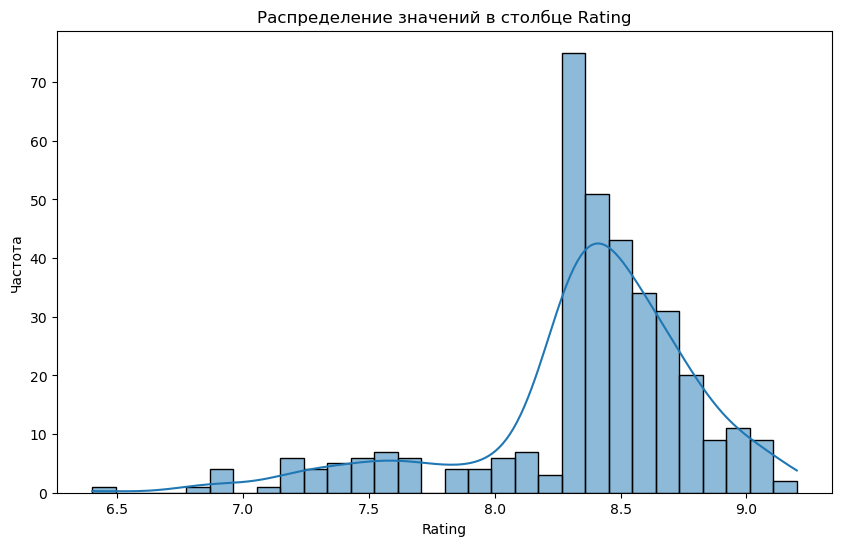

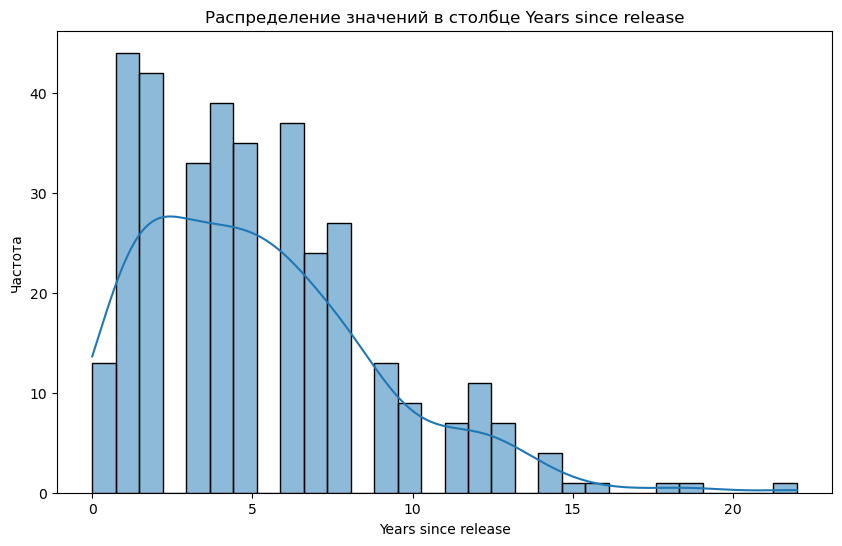

Выбросы в столбце Year of release:
84     2003
227    2006
266    2007
Name: Year of release, dtype: int64
--------------------------------------------------
Выбросы в столбце Number of Episodes:
100    100
135     62
227     81
229    133
323    128
348    124
Name: Number of Episodes, dtype: int64
--------------------------------------------------
Выбросы в столбце Rating:
344    6.9
345    6.9
346    6.9
347    6.9
348    6.8
349    6.4
Name: Rating, dtype: float64
--------------------------------------------------
Выбросы в столбце Years since release:
84     22
227    19
266    18
Name: Years since release, dtype: int64
--------------------------------------------------


In [7]:
# Визуализация выбросов для числовых столбцов
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограммы для всех числовых столбцов, данные из первой работы
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение значений в столбце {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()
    
# Определение выбросов
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    print(f'Выбросы в столбце {col}:')
    print(outliers[col])
    print('-'*50)

In [28]:
# Удаление выбросов по рейтингу (< 7)
df = df[(df['Rating'] >= 7)]

# Обработка выбросов по году выпуска (до 2008)
df = df[(df['Year of release'] >= 2008)]

# Обработка выбросов по количеству эпизодов (>61)
df = df[(df['Number of Episodes'] <= 61)]

# Обработка выбросов по количеству лет с момента выпуска (> 17)
df = df[(df['Years since release'] <= 17)]

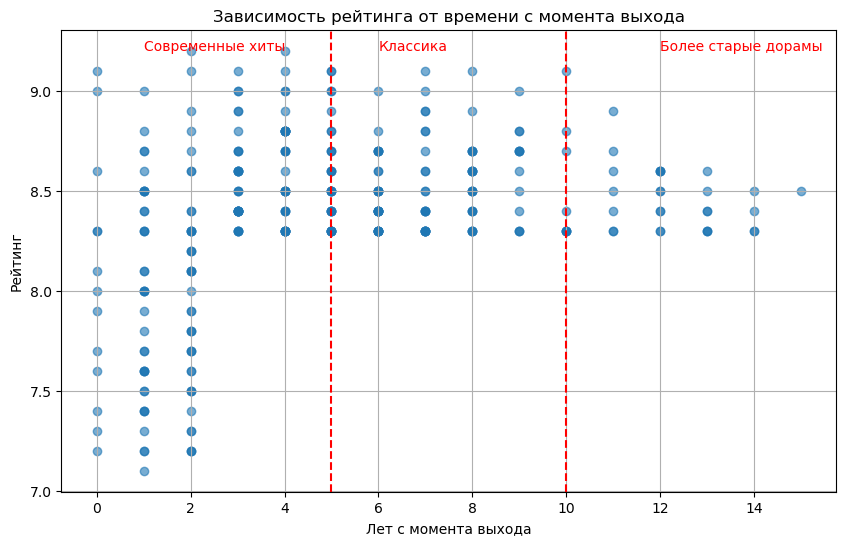

In [29]:
from sklearn.cluster import KMeans

# Выбор оптимального количества кластеров
optimal_clusters = 3

# Рейтинг vs Годы с момента выхода
plt.figure(figsize=(10, 6))
plt.scatter(df['Years since release'], df['Rating'], alpha=0.6)
plt.title('Зависимость рейтинга от времени с момента выхода')
plt.xlabel('Лет с момента выхода')
plt.ylabel('Рейтинг')
plt.grid(True)

# Выявленные кластеры:
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--')
plt.text(1, 9.2, 'Современные хиты', color='red')
plt.text(6, 9.2, 'Классика', color='red')
plt.text(12, 9.2, 'Более старые дорамы', color='red')
plt.show()

# "Современные хиты" (0-5 лет) - в список попали дорамы с рейтингом ниже 8.3 (дорамы из других 
# кластеров с подобным рейтингом не вошли в общий список), наибольшее количество дорам с рейтингом выше 9

# "Классика" (5-10 лет) - достаточно много оценко от 8.2 до 9.1

# "Более старые дорамы" (10+ лет) - в среднем рейтинги 8.2 до 8.6

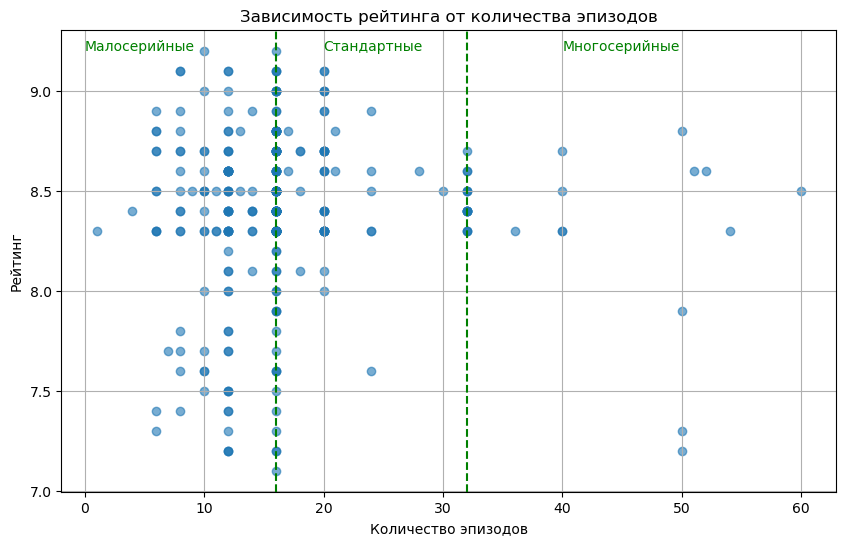

In [31]:
# Количество эпизодов vs Рейтинг
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Episodes'], df['Rating'], alpha=0.6)
plt.title('Зависимость рейтинга от количества эпизодов')
plt.xlabel('Количество эпизодов')
plt.ylabel('Рейтинг')
plt.grid(True)

# Выявленные кластеры:
plt.axvline(x=16, color='g', linestyle='--')
plt.axvline(x=32, color='g', linestyle='--')
plt.text(0, 9.2, 'Малосерийные', color='green')
plt.text(20, 9.2, 'Стандартные', color='green')
plt.text(40, 9.2, 'Многосерийные', color='green')
plt.show()

# "Малосерийные" (до 16 эп.) - часто высокие рейтинги, с широким разбросом рейтингов

# "Стандартные" (16-32 эп.) - основной кластер, преимущественно высокие оценки

# "Многосерийные" (32+ эп.) - редкие, с широким разбросом рейтингов

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


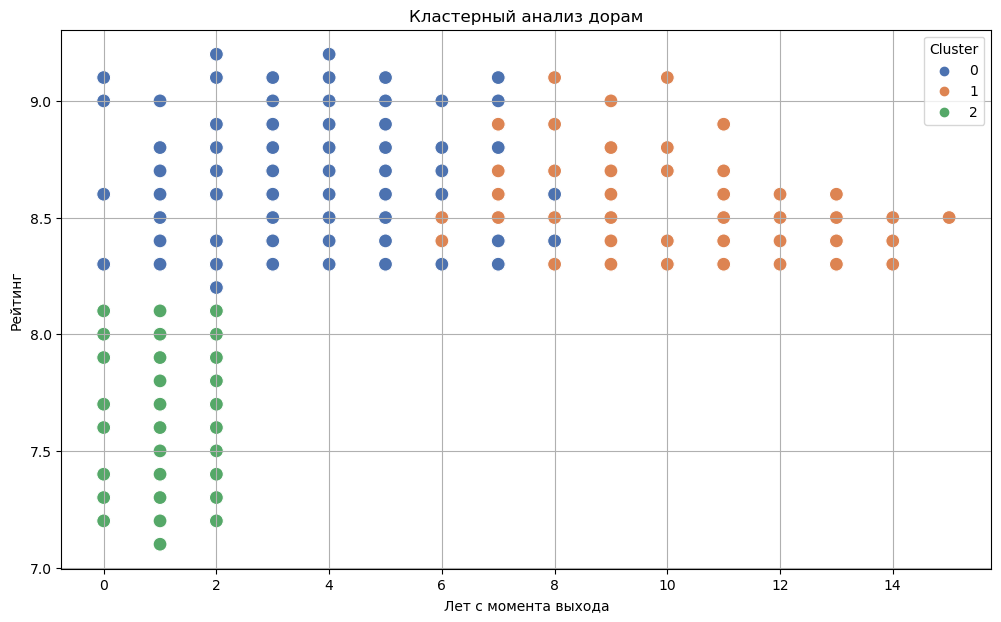

In [32]:
from sklearn.cluster import KMeans

# Выбираем числовые признаки
X = df[['Rating', 'Years since release', 'Number of Episodes']]

# Масштабирование данных
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Years since release', y='Rating', 
                hue='Cluster', palette='deep', s=100)
plt.title('Кластерный анализ дорам')
plt.xlabel('Лет с момента выхода')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()

# Выявленные кластеры:

# Новые высокооцененные (0-6 лет, рейтинг 8.2+)
# Новые и средние по рейтингу (0-2 года, 7.0-8.2)
# Старые культовые дорамы (6-15 лет, рейтинг 8.2+)